# Rotten Tomatoes Info Dataset 

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sqlite
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [26]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Number of movies per rating

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: id, dtype: int64


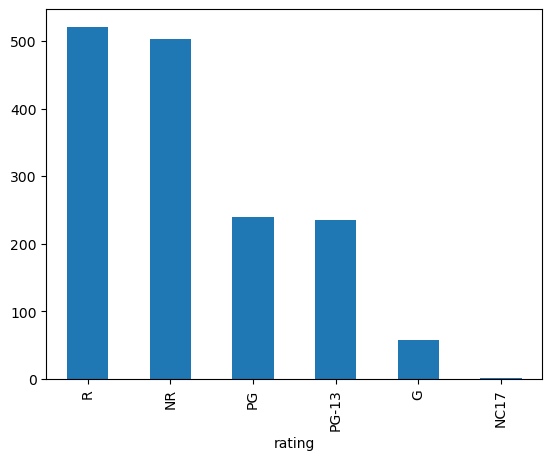

In [61]:
movies_per_rating = rt_info.groupby('rating').count()['id'].sort_values(ascending=False)
print(movies_per_rating)
movies_per_rating.plot(kind='bar');

## Runtime distribution 

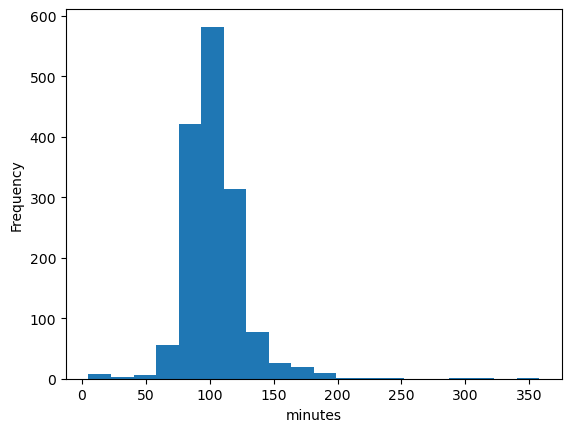

In [148]:
rt_info.runtime = rt_info.runtime.map(lambda x: x.strip(' minutes') if type(x) == str else x)
rt_info.runtime = rt_info.runtime.map(lambda x: float(x) if x != np.nan else x)
rt_info.runtime.plot(kind='hist', bins = 20, xlabel = 'minutes');

In [141]:
runtime_mean = rt_info.runtime.mean()
runtime_median = rt_info.runtime.median()
print(f"runtime mean: {runtime_mean}\nruntime median: {runtime_median}")

runtime mean: 103.96797385620916
runtime median: 100.0


## Runtime by theater release date

/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

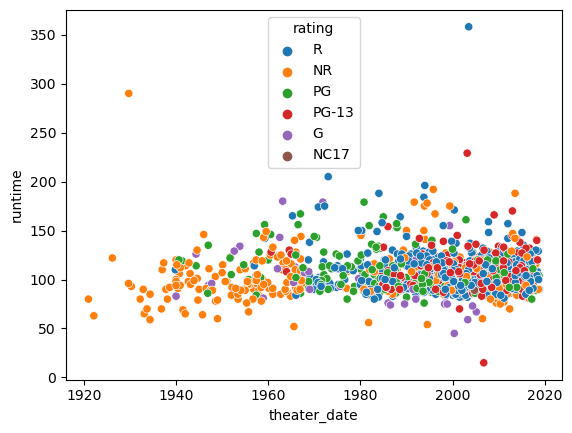

In [151]:
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'])

# rt_info.plot(kind = 'scatter', x = 'theater_date', y = 'runtime');
sns.scatterplot(data=rt_info, x='theater_date', y='runtime', hue='rating');

## 45 < Runtime <  200

/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/juank/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

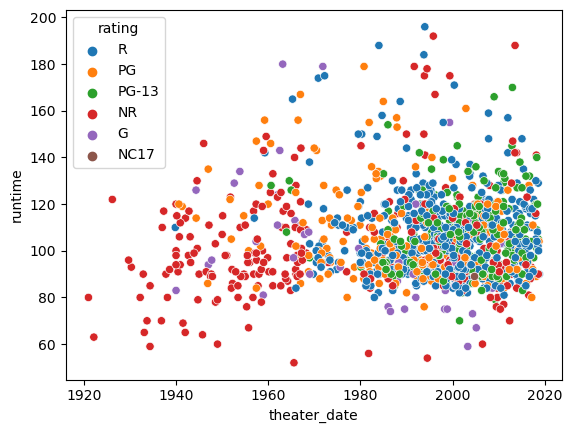

In [152]:
# rt_info[(rt_info.runtime > 45) & (rt_info.runtime < 200)].plot(kind = 'scatter', x = 'theater_date', y = 'runtime');
limited_runtime_df = rt_info[(rt_info.runtime > 45) & (rt_info.runtime < 200)]
sns.scatterplot(data=limited_runtime_df, x='theater_date', y='runtime', hue='rating');

## Amount of movies by genre 

In [183]:
rt_info.genre = rt_info.genre.map(lambda x: x.split('|') if type(x) == str else x)
exploded_genre_df = rt_info.explode('genre')

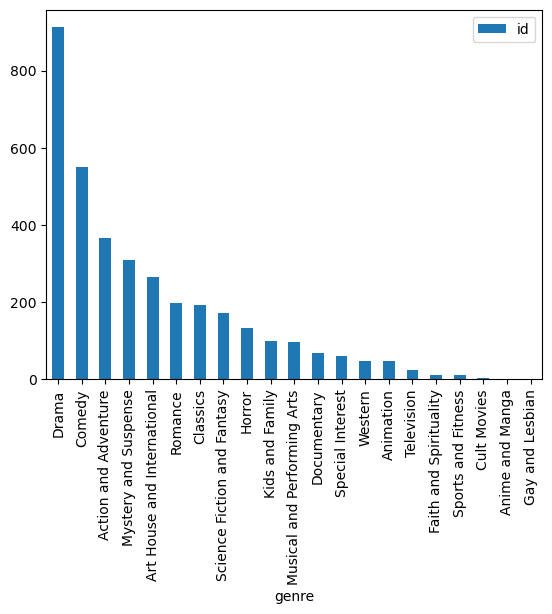

In [184]:
exploded_genre_df.groupby('genre').count().sort_values(by='id', ascending=False).plot(kind='bar', y='id');

In [190]:
rt_info.writer = rt_info.writer.map(lambda x: x.split('|') if type(x) == str else x)
exploded_writer_df = rt_info.explode('writer')b

In [195]:
rt_info.director = rt_info.director.map(lambda x: x.split('|') if type(x) == str else x)
exploded_director_df = rt_info.explode('director')

In [203]:
exploded_writer_df.to_csv('exploded_writer_df.csv')